1. Import Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score


2. Load Dataset

In [24]:
df = pd.read_csv("ToyotaCorolla - MLR.csv")  # Replace with your dataset path

# Clean column names
df.columns = df.columns.str.strip()

# Check columns
print(df.columns.tolist())


['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']


3. Exploratory Data Analysis (EDA)


              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

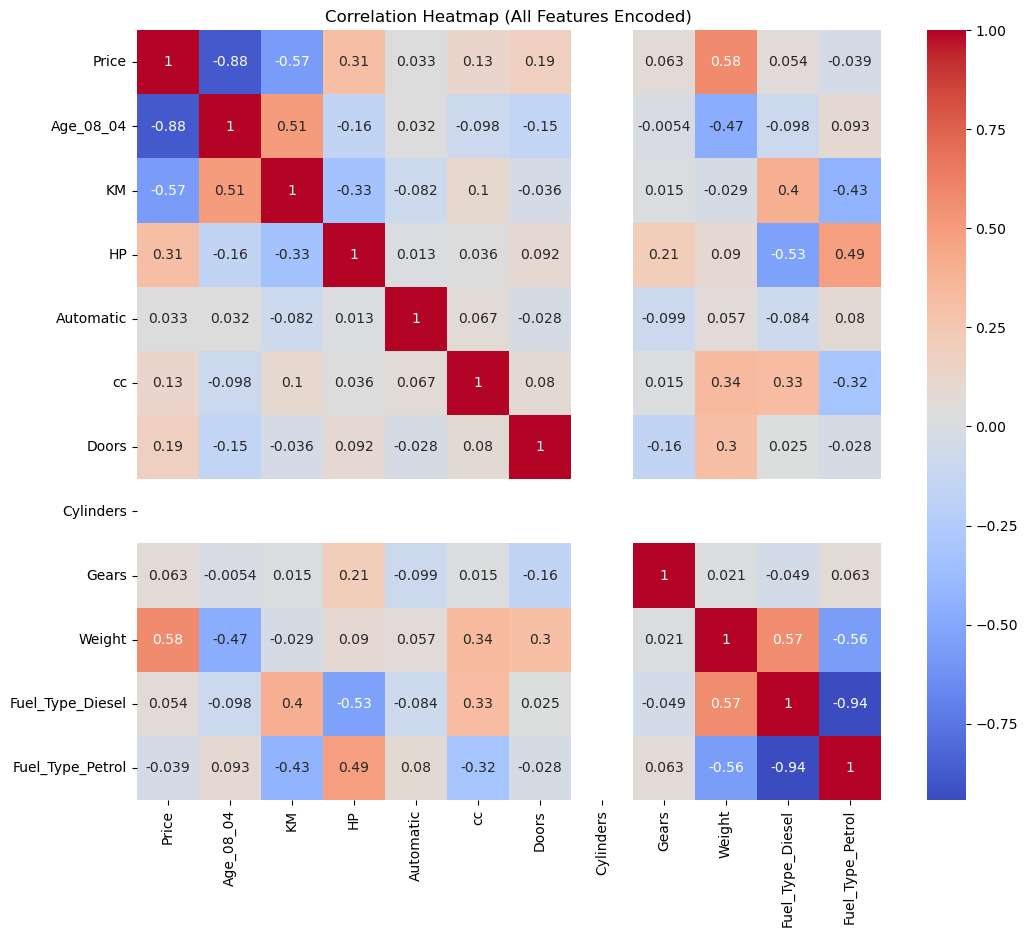

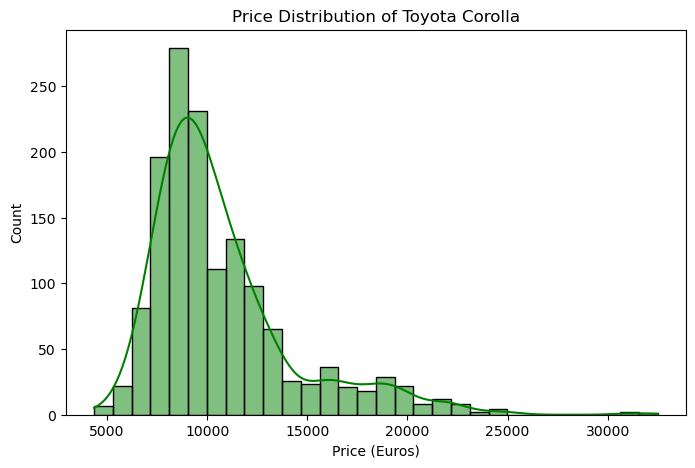

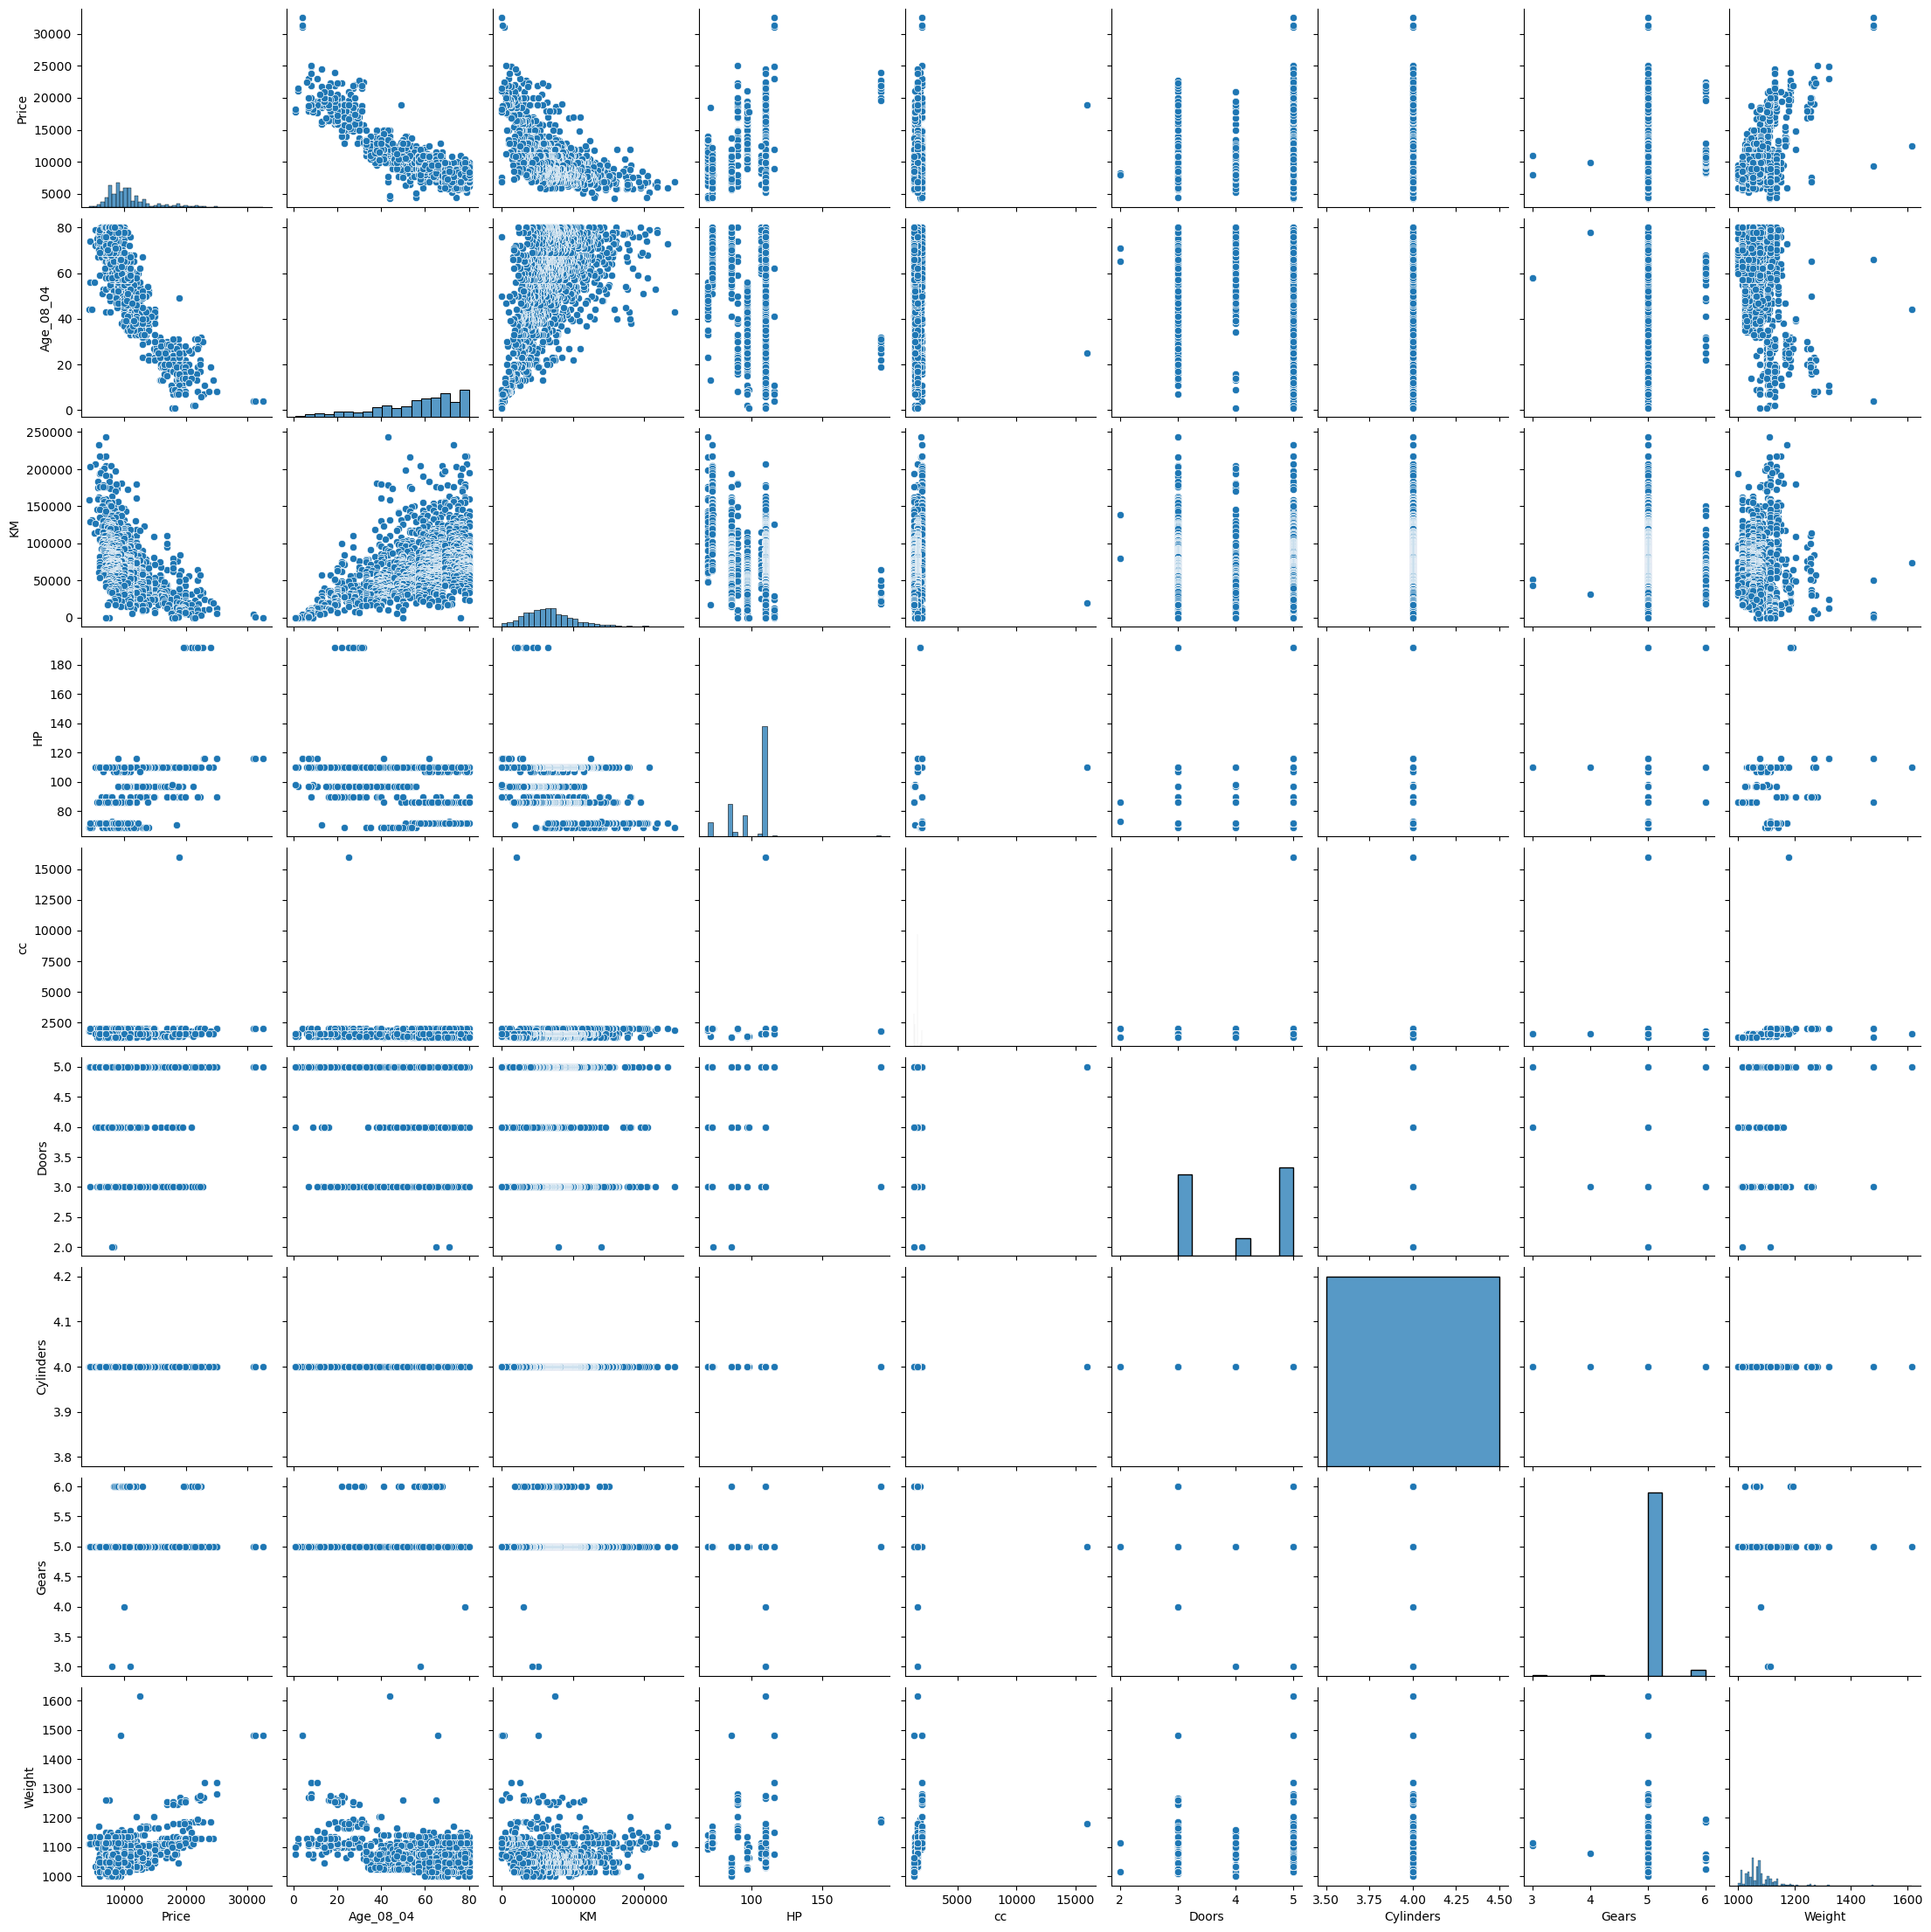

In [25]:

# Display general statistics of all numeric columns
print(df.describe())

# Display info about dataset (column types, non-null counts)
print(df.info())

# Check for missing values in each column
print(df.isnull().sum())


# 'Fuel_Type' and 'Automatic' are categorical, so convert to string first
categorical_cols = ['Fuel_Type', 'Automatic']  
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype(str)

# Use one-hot encoding for 'Fuel_Type' to convert categories to numeric
# drop_first=True avoids dummy variable trap
df_encoded = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)


# Visualize correlations between all numeric features after encoding
plt.figure(figsize=(12,10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (All Features Encoded)')
plt.show()


# Plot histogram with KDE for target variable 'Price'
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=30, kde=True, color='green')
plt.title('Price Distribution of Toyota Corolla')
plt.xlabel('Price (Euros)')
plt.ylabel('Count')
plt.show()


# Visualize relationships between Price and other numeric variables
numeric_features = ['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']
sns.pairplot(df[['Price'] + numeric_features])
plt.show()


4. Data Preprocessing

In [26]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Encode 'Fuel_Type' using one-hot encoding
df_model = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

# Convert 'Automatic' column to numeric if it contains Yes/No
if df_model['Automatic'].dtype == object:
    df_model['Automatic'] = df_model['Automatic'].map({'Yes':1, 'No':0})

# Separate features and target
X = df_model.drop('Price', axis=1)
y = df_model['Price']

# Impute missing values with mean (instead of dropping rows)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)



d:\class\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Automatic']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


5. Split Dataset

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


6. Model 1: Basic Linear Regression

In [28]:
lr1 = LinearRegression()
lr1.fit(X_train, y_train)
y_pred1 = lr1.predict(X_test)

print("Model 1 Coefficients:", lr1.coef_)
print("Model 1 Intercept:", lr1.intercept_)
print("Model 1 MSE:", mean_squared_error(y_test, y_pred1))
print("Model 1 R2:", r2_score(y_test, y_pred1))


Model 1 Coefficients: [-2.23976696e+03 -6.10531018e+02  2.01561875e+02 -9.19987178e+00
 -6.18990877e+01 -3.41060513e-13  1.00113388e+02  1.37944869e+03
 -3.59853519e+01  4.47838775e+02]
Model 1 Intercept: 10746.917446884923
Model 1 MSE: 2218506.418180141
Model 1 R2: 0.8337299312634069


7. Model 2: Using Selected Features

In [32]:
from sklearn.impute import SimpleImputer

selected_features = ['Age_08_04','KM','HP','cc','Weight','Automatic']
X2 = df_model[selected_features]

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X2_imputed = imputer.fit_transform(X2)

# Scale
X2_scaled = scaler.fit_transform(X2_imputed)

# Split
X2_train, X2_test, y_train2, y_test2 = train_test_split(
    X2_scaled, y, test_size=0.2, random_state=42
)

# Train
lr2 = LinearRegression()
lr2.fit(X2_train, y_train2)
y_pred2 = lr2.predict(X2_test)

print("Model 2 MSE:", mean_squared_error(y_test2, y_pred2))
print("Model 2 R2:", r2_score(y_test2, y_pred2))


Model 2 MSE: 1995964.8372853638
Model 2 R2: 0.8504087218447196


d:\class\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Automatic']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


8. Model 3: Log-Transform Target

In [33]:
y_log = np.log(y)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_scaled, y_log, test_size=0.2, random_state=42)

lr3 = LinearRegression()
lr3.fit(X_train3, y_train3)
y_pred3_log = lr3.predict(X_test3)

# Convert back to original scale
y_pred3 = np.exp(y_pred3_log)

print("Model 3 MSE:", mean_squared_error(y_test, y_pred3))
print("Model 3 R2:", r2_score(y_test, y_pred3))


Model 3 MSE: 1682908.854560991
Model 3 R2: 0.8738712817631542


9. Lasso Regression

In [34]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("Lasso MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso R2:", r2_score(y_test, y_pred_lasso))


Lasso MSE: 2218171.008061222
Lasso R2: 0.8337550691954276


10. Ridge Regression